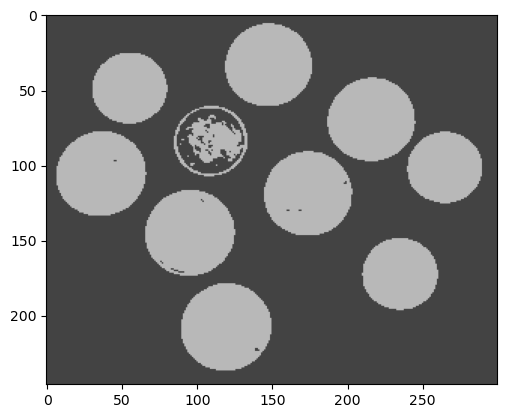

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
 
%matplotlib inline
 
# Read in the image
image = cv.imread('coins.png')
 
# Change color to RGB (from BGR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

# Define criteria = ( type, max_iter = 100 , epsilon = 0.85)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# perform k-means clustering
k=2
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

In [2]:
from math import log10, sqrt
import cv2
import numpy as np
  
# Utility function to measure peak signal to noise ratio
def PSNR(original, segmented):
    mse = np.mean((original - segmented) ** 2)
    # MSE is zero means no noise is present in the signal, no importance
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Utility function to calculate Intersection Over Union(IoU)
def calculate_iou(image1, image2):
    # Ensure the images have the same shape
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions.")

    # Calculate the intersection and union of the two binary masks
    intersection = np.logical_and(image1, image2)
    union = np.logical_or(image1, image2)

    # Calculate the IoU
    iou = np.sum(intersection) / np.sum(union)

    return iou

# Utility arrays to record values
titles = ["k-means", "erosion", "dilation", "opening", "closing"]
psnr_arr = []
iou_arr = []

In [3]:
image_gt = cv.imread("Coins-GT.png")

# Convert segmented image into binary for performance evaluation
ret, bin_segmented_image = cv2.threshold(segmented_image, 128, 255, cv2.THRESH_BINARY)

# Compute and record the values
v1 = PSNR(image_gt, bin_segmented_image)
v2 = calculate_iou(image_gt, bin_segmented_image)
psnr_arr.append(v1)
iou_arr.append(v2)

print("K-means clustering result")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

K-means clustering result
PSNR value : 66.08886825077437
IoU percentage: 0.9496825870222828


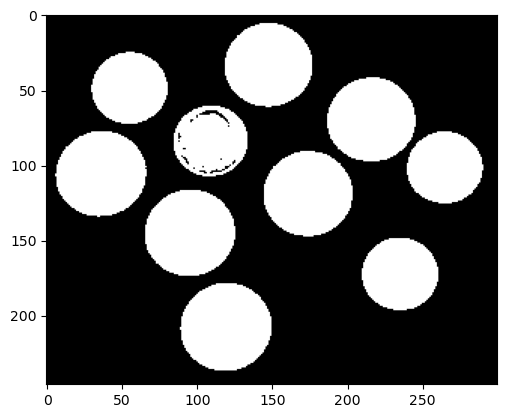

In [4]:
plt.imshow(image_gt)

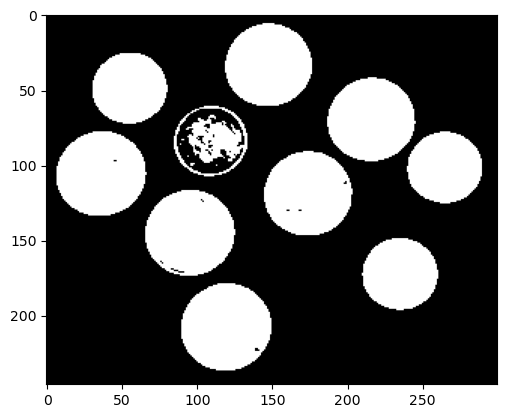

In [5]:
plt.imshow(bin_segmented_image)

After performing erosion
PSNR value : 62.688442133679054
IoU percentage: 0.8899066933662818


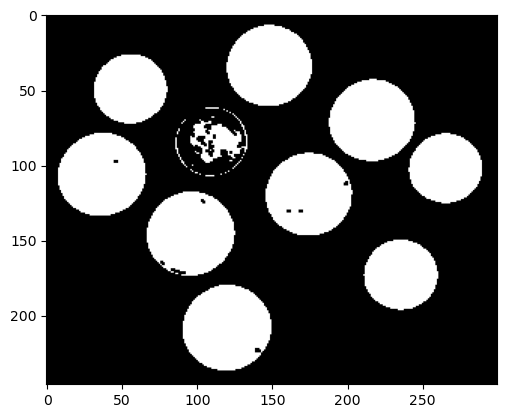

In [6]:
# Apply morphological operation
size = 2
kernel = np.ones((size,size),np.uint8)

## Erosion
erosion = cv.erode(bin_segmented_image, kernel, iterations=1)
plt.imshow(erosion)

# Compute and record the values
v1 = PSNR(image_gt, erosion)
v2 = calculate_iou(image_gt, erosion)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing erosion")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

After performing dilation
PSNR value : 65.17975347713934
IoU percentage: 0.9400872356184676


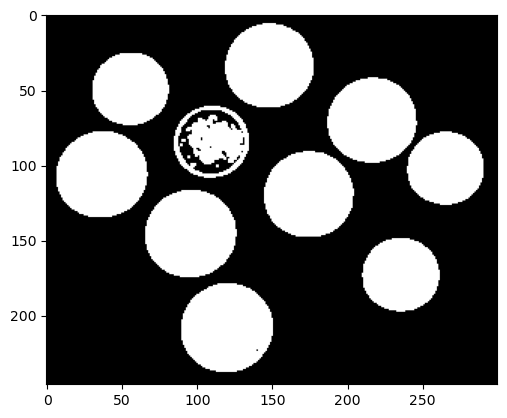

In [7]:
## Dilation
dilation = cv.dilate(bin_segmented_image, kernel, iterations=1)
plt.imshow(dilation)

# Compute and record the values
v1 = PSNR(image_gt, dilation)
v2 = calculate_iou(image_gt, dilation)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing dilation")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

After performing opening
PSNR value : 62.99660632415922
IoU percentage: 0.8999168399168399


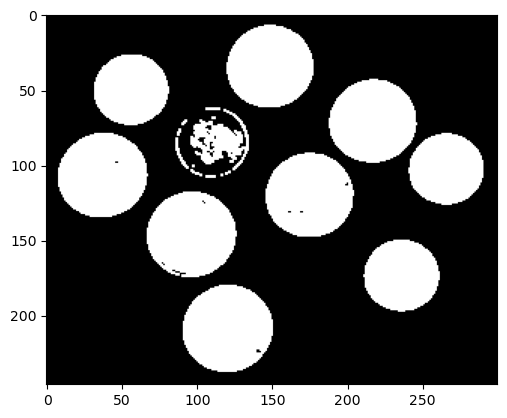

In [8]:
## Opening
opening = cv.morphologyEx(bin_segmented_image, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening)

# Compute and record the values
v1 = PSNR(image_gt, opening)
v2 = calculate_iou(image_gt, opening)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing opening")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

After performing closing
PSNR value : 62.99660632415922
IoU percentage: 0.8999168399168399


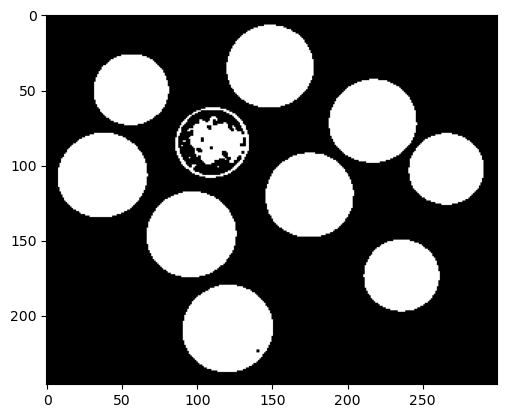

In [9]:
## Closing
closing = cv.morphologyEx(bin_segmented_image, cv.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(closing)

# Compute and record the values
v1 = PSNR(image_gt, opening)
v2 = calculate_iou(image_gt, opening)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing closing")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

K-means clustering with Lloyd algorithm


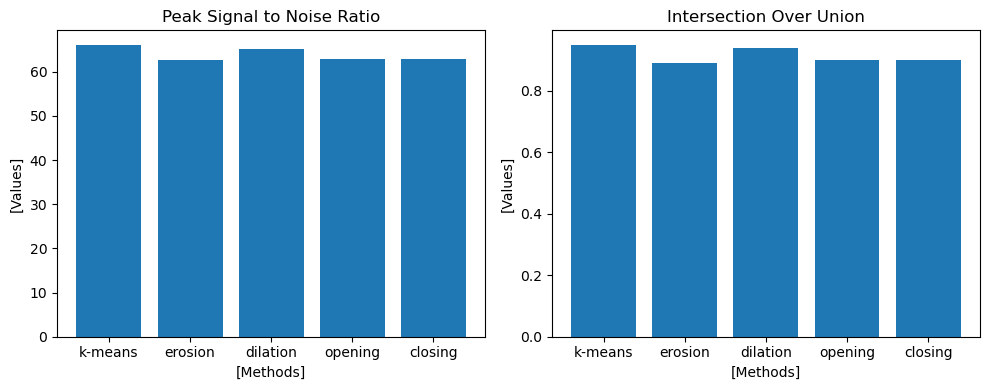

In [10]:
# Make the values to be extreme, so that difference are visible
def power_transform(data, power=3):
    transformed_data = [x ** power for x in data]
    return transformed_data
#psnr_arr = power_transform(psnr_arr)
#iou_arr = power_transform(iou_arr)

print("K-means clustering with Lloyd algorithm")
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot the first bar chart in the first subplot
axs[0].bar(titles, psnr_arr)
axs[0].set_title('Peak Signal to Noise Ratio')
axs[0].set_xlabel('[Methods]')
axs[0].set_ylabel('[Values]')

# Plot the second bar chart in the second subplot
axs[1].bar(titles, iou_arr)
axs[1].set_title('Intersection Over Union')
axs[1].set_xlabel('[Methods]')
axs[1].set_ylabel('[Values]')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [11]:
from sklearn.cluster import KMeans
from pyswarm import pso

# Define the objective function for PSO
def objective_function(positions):
    # Reshape the positions to cluster centroids
    centroids = positions.reshape(-1, 3)
    # Assign each pixel to the closest centroid
    labels = KMeans(n_clusters=len(centroids), init=centroids, n_init=1).fit_predict(pixel_vals)
    # Calculate the mean squared error between the original pixels and the centroids
    mse = np.mean((pixel_vals - centroids[labels]) ** 2)
    return mse

# Define the bounds for the PSO optimization
# The bounds represent the possible values for each channel of a pixel (0 to 255)
num_centroids = 2  # Number of clusters/centroids
num_particles = num_centroids * 10 # Number of particles in PSO
lower_bound = np.zeros(3 * num_centroids)
upper_bound = np.ones(3 * num_centroids) * 255

# Perform PSO optimization
result, _ = pso(objective_function, lower_bound, upper_bound, swarmsize=num_particles)

Stopping search: Swarm best objective change less than 1e-08


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


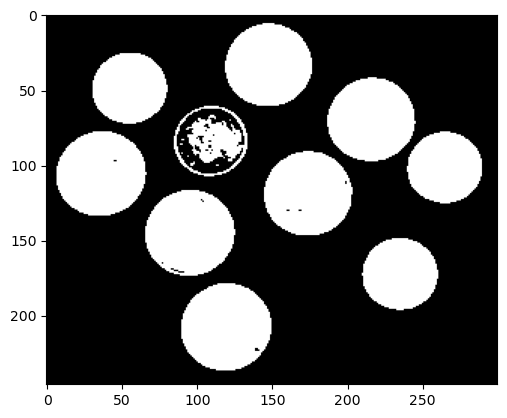

In [12]:
# Reshape the optimized result to get the final centroids
centroids = result.reshape(-1, 3)

# Assign each pixel to the closest centroid
labels = KMeans(n_clusters=2, init="k-means++", n_init=1).fit_predict(pixel_vals)

# Replace the pixels with the centroid values
pso_segmented_image = centroids[labels].reshape(image.shape)

# Convert segmented image into binary for performance evaluation
ret, pso_segmented_image = cv2.threshold(pso_segmented_image, 128, 255, cv2.THRESH_BINARY)

# Display the original and segmented images
plt.imshow(pso_segmented_image)

In [13]:
# Utility arrays to record values
titles = ["pso_k-means", "erosion", "dilation", "opening", "closing"]
psnr_arr = []
iou_arr = []

# Compute and record the values
v1 = PSNR(image_gt, pso_segmented_image)
v2 = calculate_iou(image_gt, pso_segmented_image)
psnr_arr.append(v1)
iou_arr.append(v2)

print("PSO Optimized K-means clustering result")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

PSO Optimized K-means clustering result
PSNR value : 18.16132445776935
IoU percentage: 0.9519832985386222


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


After performing erosion
PSNR value : 14.666558210414975
IoU percentage: 0.8926334625708321


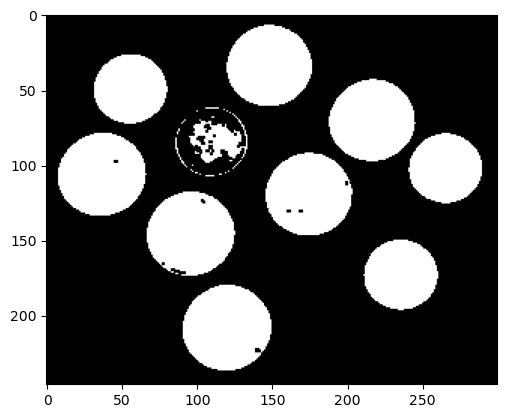

In [14]:
# Apply morphological operation
size = 2
kernel = np.ones((size,size),np.uint8)

## Erosion
erosion = cv.erode(pso_segmented_image, kernel, iterations=1)
plt.imshow(erosion)

# Compute and record the values
v1 = PSNR(image_gt, erosion)
v2 = calculate_iou(image_gt, erosion)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing erosion")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


After performing dilation
PSNR value : 17.142414974785126
IoU percentage: 0.9413845584303402


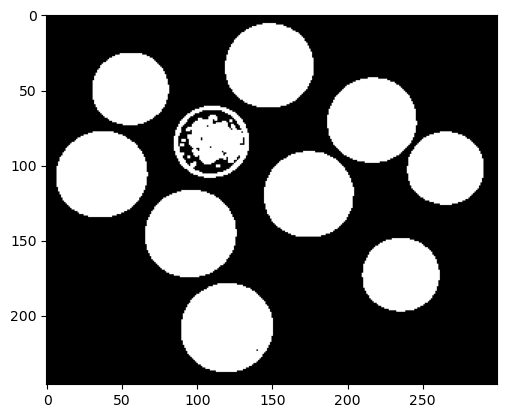

In [15]:
## Dilation
dilation = cv.dilate(pso_segmented_image, kernel, iterations=1)
plt.imshow(dilation)

# Compute and record the values
v1 = PSNR(image_gt, dilation)
v2 = calculate_iou(image_gt, dilation)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing dilation")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


After performing opening
PSNR value : 14.936746637721594
IoU percentage: 0.9015712029262616


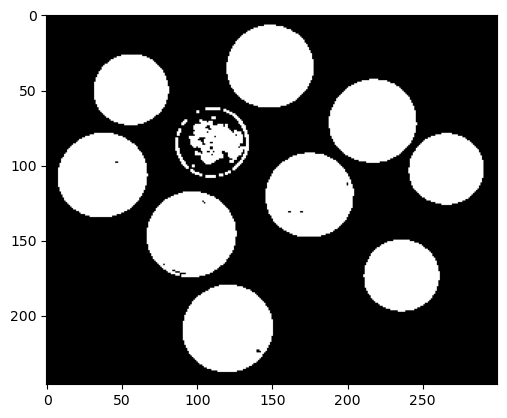

In [16]:
## Opening
opening = cv.morphologyEx(pso_segmented_image, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening)

# Compute and record the values
v1 = PSNR(image_gt, opening)
v2 = calculate_iou(image_gt, opening)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing opening")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


After performing closing
PSNR value : 14.936746637721594
IoU percentage: 0.9015712029262616


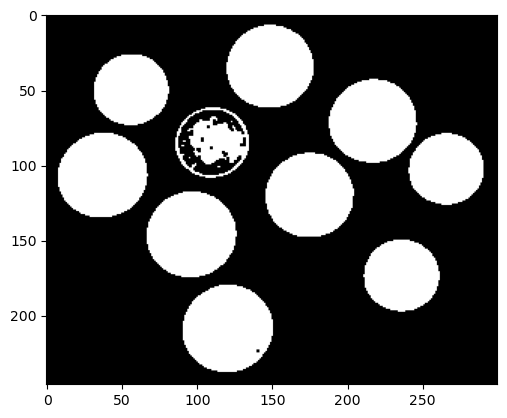

In [17]:
## Closing
closing = cv.morphologyEx(pso_segmented_image, cv.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(closing)

# Compute and record the values
v1 = PSNR(image_gt, opening)
v2 = calculate_iou(image_gt, opening)
psnr_arr.append(v1)
iou_arr.append(v2)

print("After performing closing")
print(f"PSNR value : {v1}")
print(f"IoU percentage: {v2}")

K-means clustering with particle swarm optimization


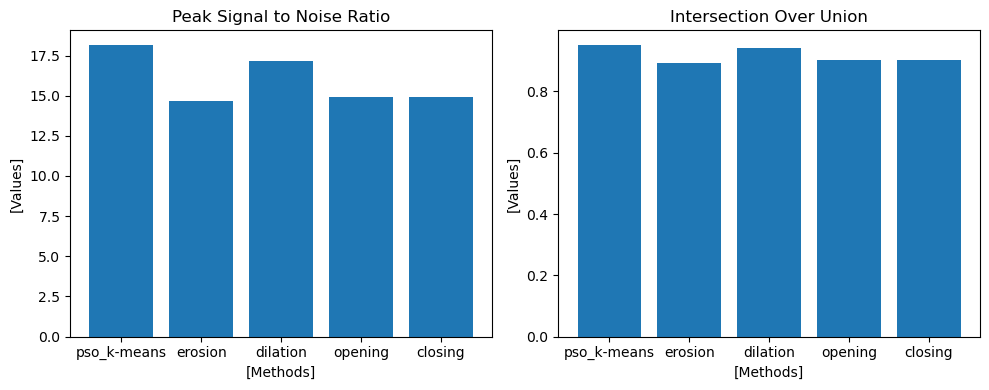

In [18]:
# Make the values to be extreme, so that difference are visible
def power_transform(data, power=3):
    transformed_data = [x ** power for x in data]
    return transformed_data
#psnr_arr = power_transform(psnr_arr)
#iou_arr = power_transform(iou_arr)

print("K-means clustering with particle swarm optimization")
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot the first bar chart in the first subplot
axs[0].bar(titles, psnr_arr)
axs[0].set_title('Peak Signal to Noise Ratio')
axs[0].set_xlabel('[Methods]')
axs[0].set_ylabel('[Values]')

# Plot the second bar chart in the second subplot
axs[1].bar(titles, iou_arr)
axs[1].set_title('Intersection Over Union')
axs[1].set_xlabel('[Methods]')
axs[1].set_ylabel('[Values]')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()